<a href="https://colab.research.google.com/github/illusionofknowledge/investing/blob/main/Reporting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get Data + Explore
### Sources:
https://wire.insiderfinance.io/introduction-to-quant-investing-with-python-c215d1014a25
https://wire.insiderfinance.io/portfolio-optimization-the-black-litterman-allocation-method-f53abb2d7ebf


In [ ]:
!pip install quantstats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.1 MB/s eta 0:00:00


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import quantstats as qs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import plotly.express as px
import yfinance as yf

In [ ]:
tdy= '2024-09-09'

In [ ]:
# Getting daily returns for 4 different US stocks in the same time window
aapl = qs.utils.download_returns('AAPL')
aapl = aapl.loc['2010-07-01':tdy]

tsla = qs.utils.download_returns('TSLA')
tsla = tsla.loc['2010-07-01':tdy]

dis = qs.utils.download_returns('DIS')
dis = dis.loc['2010-07-01':tdy]

amd = qs.utils.download_returns('AMD')
amd = amd.loc['2010-07-01':tdy]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Apple Daily Returns Plot:



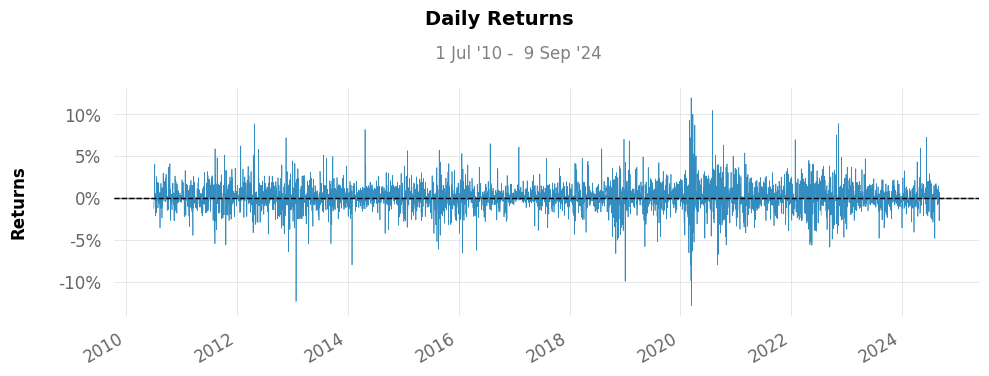


Apple Daily Returns Histogram


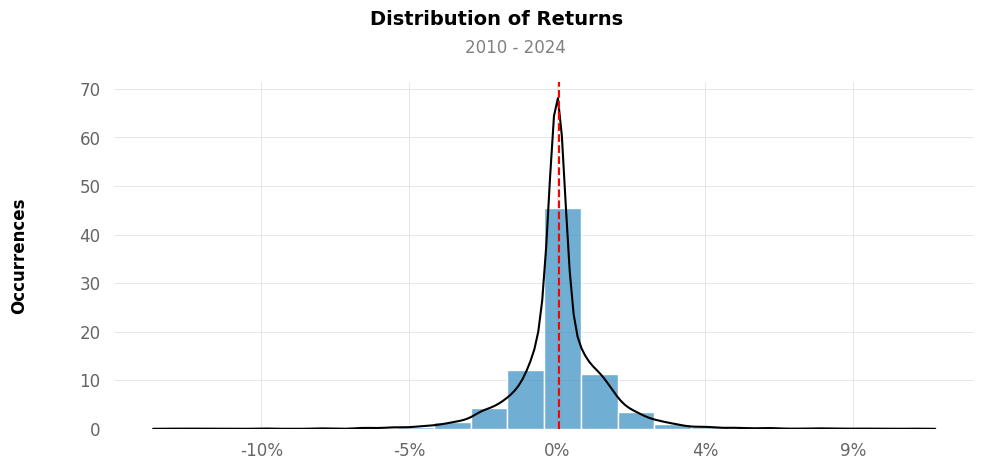

Apple's Standard Deviation from 2010 to 2023:  0.018
Apple's skewness:  -0.05
Apple's kurtosis:  5.34


In [ ]:
# Plotting Daily Returns for a stock
print('\nApple Daily Returns Plot:\n')
qs.plots.daily_returns(aapl, benchmark=None)

# Plotting histograms
print('\nApple Daily Returns Histogram')
qs.plots.histogram(aapl, resample = 'D')
# Calculating Standard Deviations
print("Apple's Standard Deviation from 2010 to 2024: ", aapl.std().round(3))
# Measuring skewness with quantstats
print("Apple's skewness: ", qs.stats.skew(aapl).round(2))
 # Using quantstats to measure kurtosis
print("Apple's kurtosis: ", qs.stats.kurtosis(aapl).round(2))

In [ ]:
# Merging daily returns into one dataframe
merged_df = pd.concat([aapl, tsla, dis, amd], join = 'outer', axis = 1)
merged_df.columns = ['aapl', 'tsla', 'dis', 'amd']
merged_df # Displaying dataframe


,aapl,tsla,dis,amd
Date,,,,
2010-07-01,-0.012126,-0.078473,-0.000317,0.009563
2010-07-02,-0.006198,-0.125683,-0.003493,-0.029770
2010-07-06,0.006844,-0.160937,0.010835,-0.018131
2010-07-07,0.040381,-0.019243,0.044767,0.049716
2010-07-08,-0.002242,0.105064,0.006035,-0.002706
...,...,...,...,...
2024-09-03,-0.027205,-0.016393,-0.013830,-0.078218
2024-09-04,-0.008619,0.041833,0.001346,0.028699
2024-09-05,0.006928,0.049041,-0.006723,-0.010151


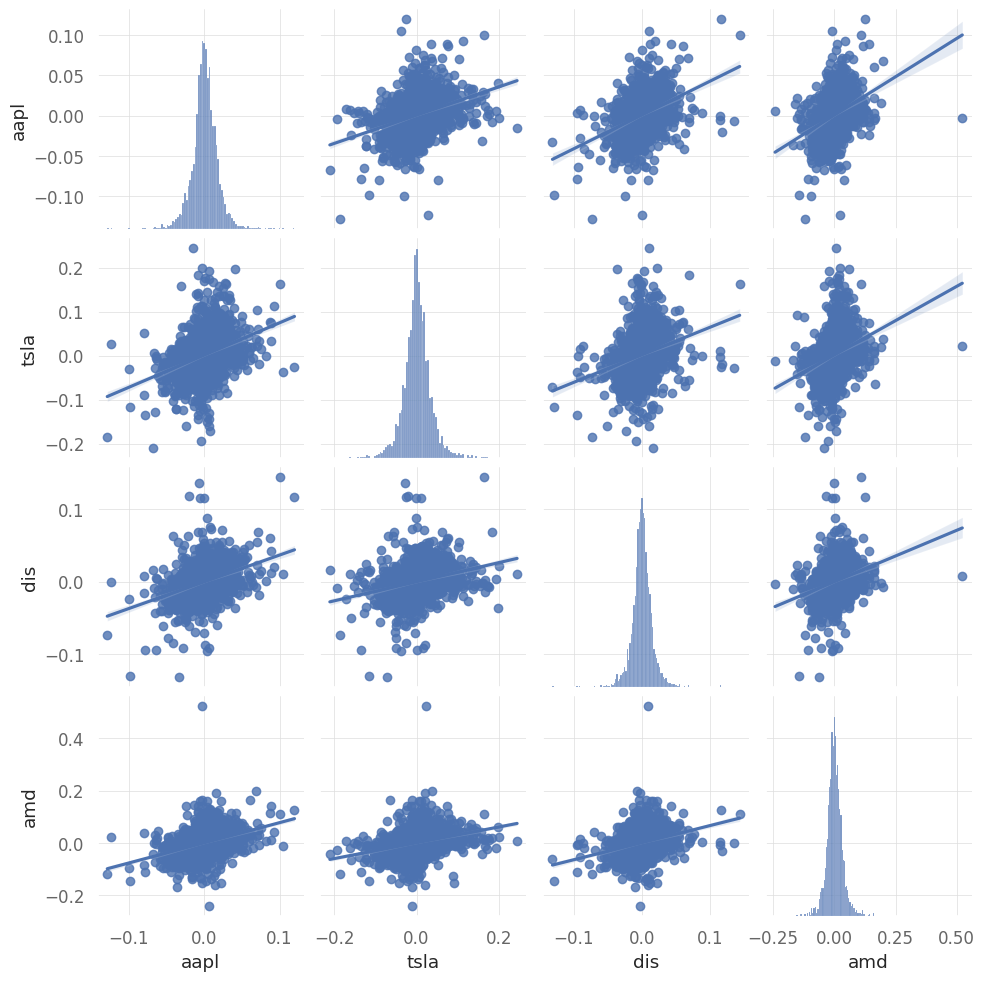

In [ ]:
# Pairplots
sns.pairplot(merged_df, kind = 'reg')
plt.show()

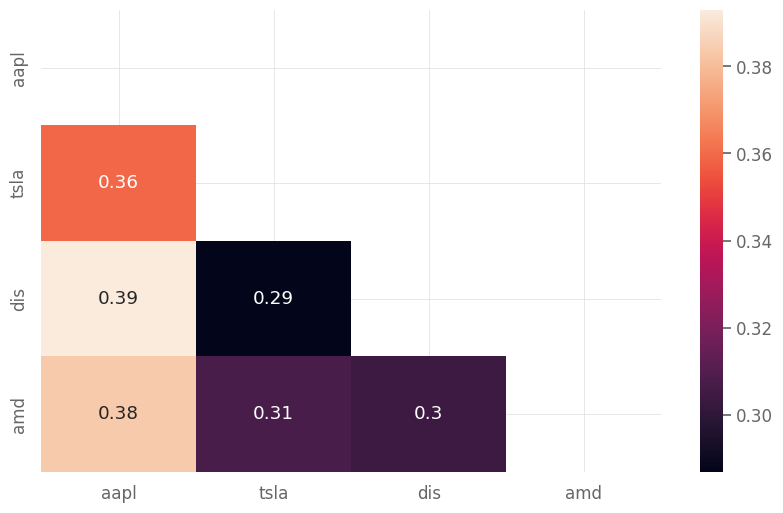

In [ ]:
# Correlation Matrix
corr = merged_df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask = mask)
plt.show()

In [ ]:
# Loading data from the SP500, the american benchmark
sp500 = qs.utils.download_returns('^GSPC')
sp500 = sp500.loc['2010-07-01':tdy]
sp500.index = sp500.index.tz_localize(None)
sp500

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2010-07-01,-0.003240
2010-07-02,-0.004662
2010-07-06,0.005359
2010-07-07,0.031331
2010-07-08,0.009413
...,...
2024-09-03,-0.021151
2024-09-04,-0.001603
2024-09-05,-0.003018


In [ ]:
# Removing indexes
sp500_no_index = sp500.reset_index(drop = True)
aapl_no_index = aapl.reset_index(drop = True)
tsla_no_index = tsla.reset_index(drop = True)
dis_no_index = dis.reset_index(drop = True)
amd_no_index = amd.reset_index(drop = True)

In [ ]:
# Fitting linear relation among Apple's returns and Benchmark
X = sp500_no_index.values.reshape(-1,1)
y = aapl_no_index.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('AAPL beta: ', beta.round(3))
print('\nAAPL alpha: ', alpha.round(6))



AAPL beta:  [1.108]

AAPL alpha:  [0.000468]


In [ ]:
print("Sharpe Ratio for AAPL: ", qs.stats.sharpe(aapl).round(2))

Sharpe Ratio for AAPL:  0.95


In [ ]:
#benchmark portfolio of four stocks
weights = [0.25, 0.25, 0.25, 0.25]
portfolio = aapl*weights[0] + tsla*weights[1] + dis*weights[2] + amd*weights[3]

qs.reports.full(portfolio, benchmark = sp500)

# Portfolio optimization + eval

In [ ]:
# Getting dataframes info for Stocks using yfinance
aapl_df = yf.download('AAPL', start = '2010-07-01', end = tdy)
tsla_df = yf.download('TSLA', start = '2010-07-01', end = tdy)
dis_df = yf.download('DIS', start = '2010-07-01', end = tdy)
amd_df = yf.download('AMD', start = '2010-07-01', end = tdy)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
#aapl_df

In [ ]:
aapl_df = aapl_df['Adj Close']
tsla_df = tsla_df['Adj Close']
dis_df = dis_df['Adj Close']
amd_df = amd_df['Adj Close']

In [ ]:
# Merging and creating an Adj Close dataframe for stocks
df = pd.concat([aapl_df, tsla_df, dis_df, amd_df], join = 'outer', axis = 1)
df.columns = ['aapl', 'tsla', 'dis', 'amd']
df # Visualizing dataframe for input

,aapl,tsla,dis,amd
Date,,,,
2010-07-01,7.494112,1.464000,27.214069,7.390000
2010-07-02,7.447668,1.280000,27.119005,7.170000
2010-07-06,7.498639,1.074000,27.412840,7.040000
2010-07-07,7.801444,1.053333,28.640017,7.390000
2010-07-08,7.783949,1.164000,28.812866,7.370000
...,...,...,...,...
2024-08-30,229.000000,214.110001,90.379997,148.559998
2024-09-03,222.770004,210.600006,89.129997,136.940002
2024-09-04,220.850006,219.410004,89.250000,140.869995


In [ ]:
# Importing libraries for portfolio optimization
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
# Calculating the annualized expected returns and the annualized sample covariance matrix
mu = expected_returns.mean_historical_return(df) #expected returns
S = risk_models.sample_cov(df) #Covariance matrix

In [ ]:
# Optimizing for maximal Sharpe ratio
ef = EfficientFrontier(mu, S) # Providing expected returns and covariance matrix as input
weights = ef.max_sharpe() # Optimizing weights for Sharpe ratio maximization

clean_weights = ef.clean_weights() # clean_weights rounds the weights and clips near-zeros

# Printing optimized weights and expected performance for portfolio
clean_weights

OrderedDict([('aapl', 0.77523), ('tsla', 0.22477), ('dis', 0.0), ('amd', 0.0)])

In [ ]:
new_weights = [0.70828, 0.29172]
optimized_portfolio = aapl*new_weights[0] + tsla*new_weights[1]
optimized_portfolio # Visualizing daily returns

,Close
Date,
2010-07-01,-0.031481
2010-07-02,-0.041054
2010-07-06,-0.042101
2010-07-07,0.022988
2010-07-08,0.029061
...,...
2024-09-03,-0.024051
2024-09-04,0.006099
2024-09-05,0.019213


[Performance Metrics]



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2010-07-01   2010-07-01
End Period                 2024-09-09   2024-09-09
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          4,195.41%    6,052.33%
CAGR﹪                     20.06%       22.17%

Sharpe                     1.03         1.12
Prob. Sharpe Ratio         99.99%       100.0%
Smart Sharpe               1.0          1.09
Sortino                    1.51         1.65
Smart Sortino              1.47         1.6
Sortino/√2                 1.07         1.16
Smart Sortino/√2           1.04         1.13
Omega                      1.21         1.21

Max Drawdown               -52.28%      -46.18%
Longest DD Days            918          910
Volatility (ann.)          30.11%       30.05%
R^2                        0.74         0.74
Information Ratio          0.01         0.01
Calmar           

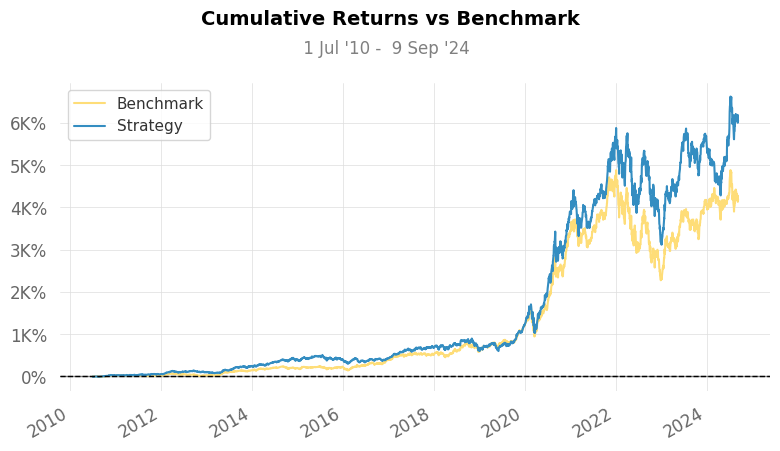

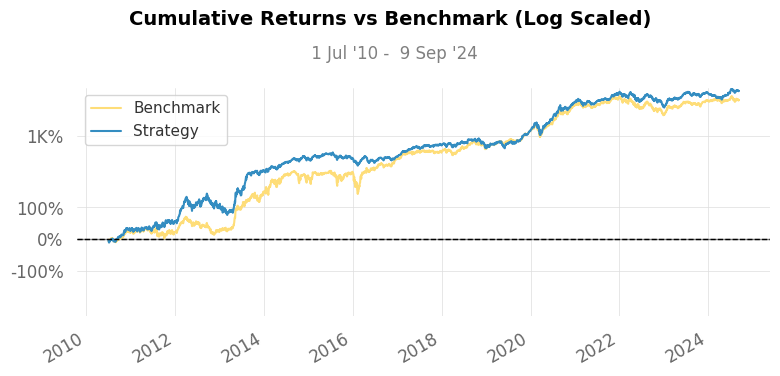

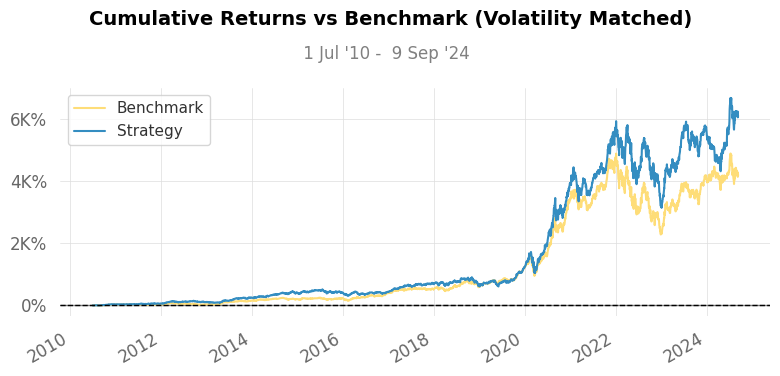

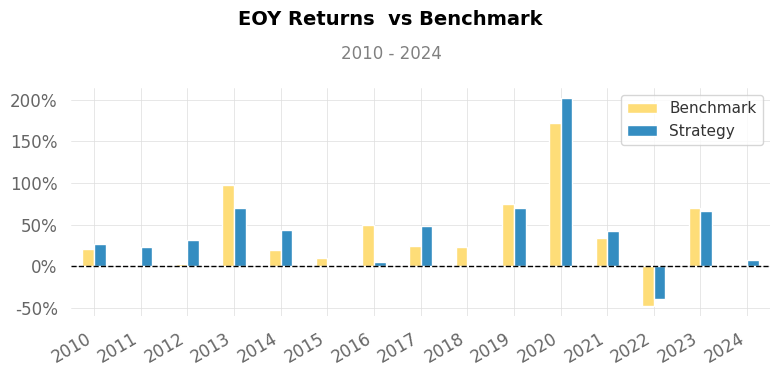

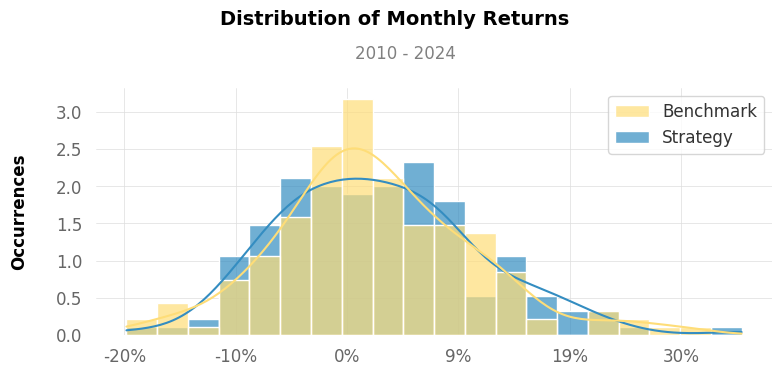

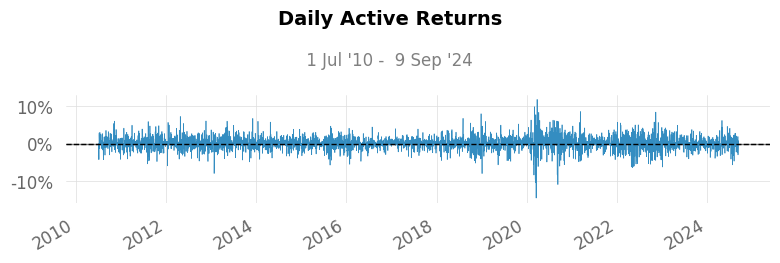

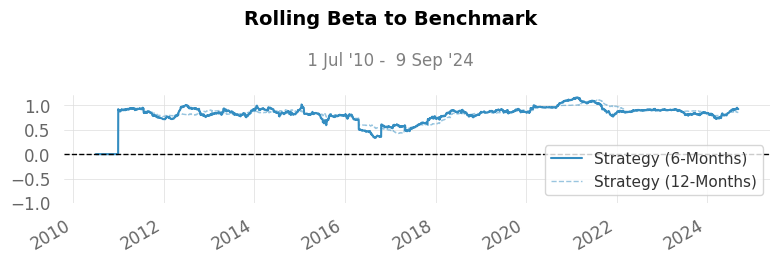

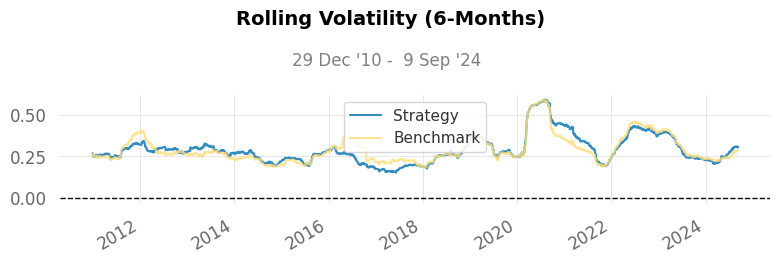

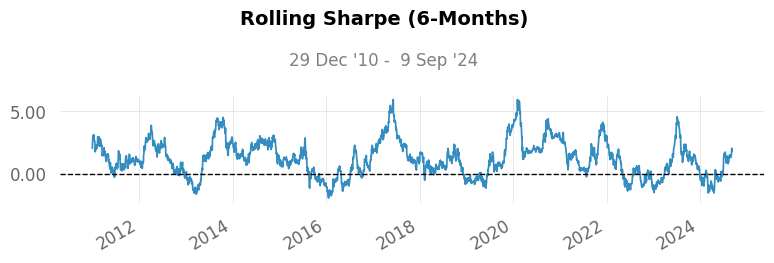

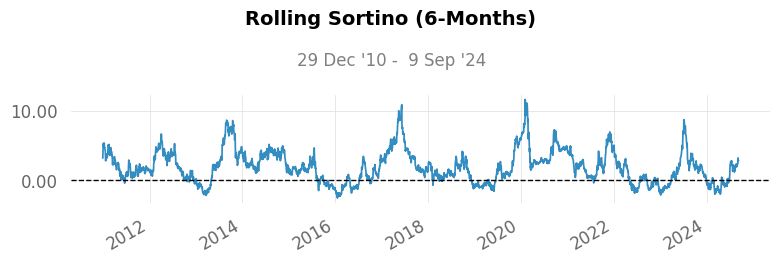

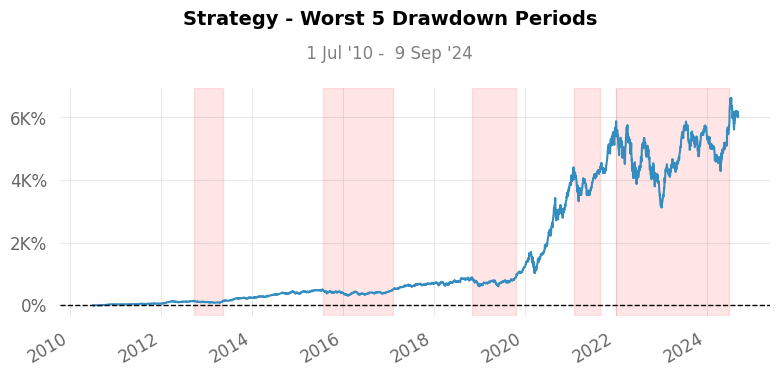

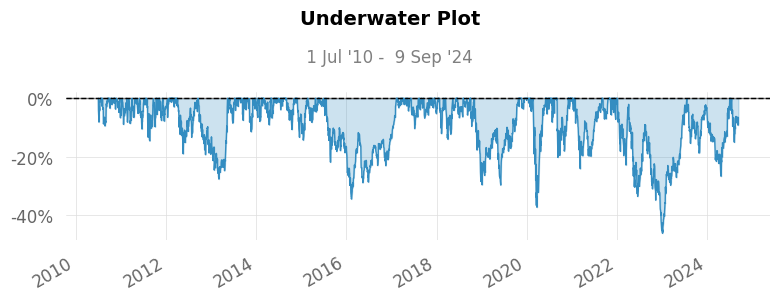

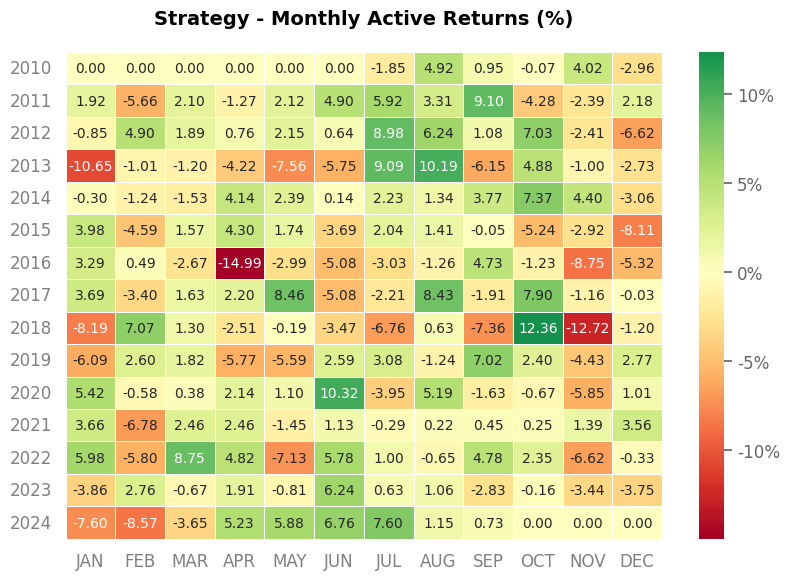

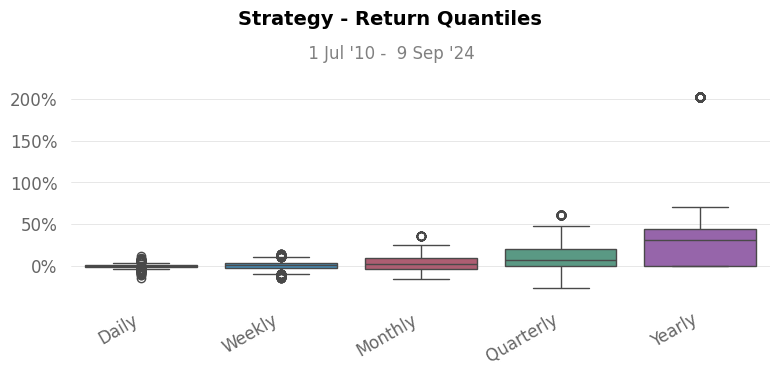

In [ ]:
qs.reports.full(optimized_portfolio, benchmark = portfolio)

In [ ]:
# installing PyPortfolioOpt
!pip install pyportfolioopt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 3.0 MB/s eta 0:00:00


In [ ]:
# Black littermann

# Black Littermann

In [ ]:
# Optimization and allocation
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import black_litterman, BlackLittermanModel

In [ ]:
assets = ['AAPL', 'TSLA', 'DIS', 'AMD']

In [ ]:
market_prices = yf.download("^GSPC",start = '2010-07-01', end = tdy)['Adj Close']
market_prices # Visualizing closing prices for the SP500

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2010-07-01,1027.369995
2010-07-02,1022.580017
2010-07-06,1028.060059
2010-07-07,1060.270020
2010-07-08,1070.250000
...,...
2024-08-30,5648.399902
2024-09-03,5528.930176
2024-09-04,5520.069824


In [ ]:
delta = black_litterman.market_implied_risk_aversion(market_prices)
delta # Visualizing delta

3.785507389428104